### Project Link

https://www.projectpro.io/article/speech-emotion-recognition-project-using-machine-learning/573#mcetoc_1fu6b81tbt

# Create 13 Layer CNN Model

### Model Diagram

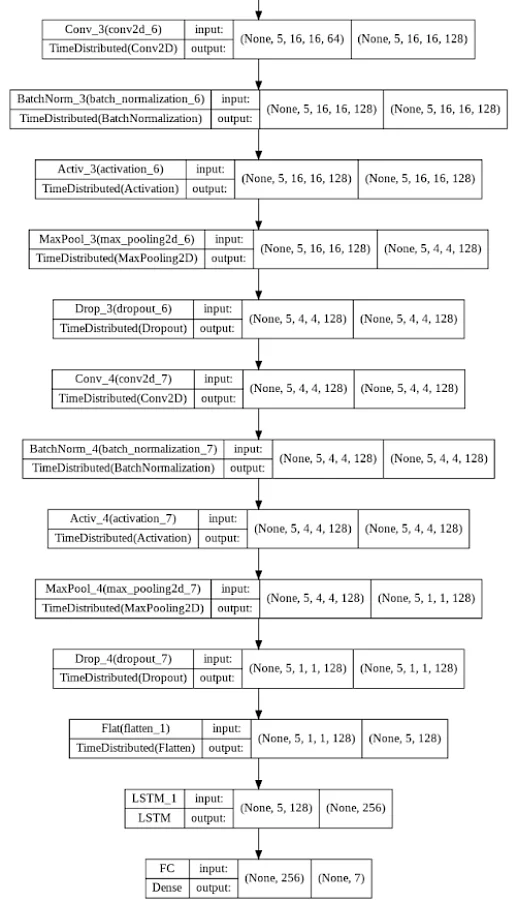

### Import Packages

In [4]:
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import LSTM, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

###### First, we create the CNN model consisting of 4 hidden layers. Next, we attach an LSTM to process the output of the CNN. Using time-distributed data, we wrap the layers of the CNN inside a layer called TimeDistributed.

In [ ]:
input_y = Input(shape = x_train.shape[1:], name = "Input")

y = TimeDistributed(Conv2D(64, 
                           kernel_size(3,3),
                           strides = (1,1),
                           padding = "same"),
                  name = "Conv_1")(input_y)


y = TimDistributed(BatchNormalization(), name = "BatchNorm_1")(y)


y = TimeDistributed(Activation('elu'), name = "Activ_1")(y)


y = TimeDistributed(MaxPooling2D(pool_size = (2,2),
                                strides = (2,2),
                                padding = 'same'),
                   name = "MaxPool_1")(y)

y = TimeDistributed(Dropout(0.2), name = "Drop_1")(y)

###### Create more hidden layers for the CNN

In [ ]:
y = TimeDistributed(Conv2D(64,
                           kernel_size = (3,3),
                           strides = (1,1),
                           padding = 'same'),
                   name = 'Conv_2')(y)

y = TimeDistributed(BatchNormalization(), name = "BatchNorm_2")(y)


y = TimeDistributed(Activation('elu'), name = "Activ_2")(y)


y = TimeDistributed(MaxPooling2D(pool_size = (4,4),
                                 strides = (4,4),
                                 padding = 'same'),
                   name = 'MaxPool_2')(y)


y = TimeDistributed(Dropout(0.2), name = "Drop_2")(y)

###### CNN 128

In [ ]:
y = TimeDistributed(Conv2D(128,
                           kernel_size = (3,3),
                           strides = (1,1),
                           padding = 'same'),
                   name = "Conv_3")(y)


y = TimeDistributed(BatchNormalization(), name = 'BatchNorm_3')(y)


y = TimeDistributed(Activation('elu'), name = "Activ_3")(y)


y = TimeDistributed(MaxPooling2D(pool_size = (4,4),
                                 strides = (4,4),
                                 padding = "same"),
                   name = "MaxPool_3")(y)


y = TimeDistributed(Dropout(0.2), name = "Drop_3")(y)

###### Second CNN 128

In [ ]:
y = TimeDistributed(Conv2D(128,
                           kernel_size = (3,3),
                           strides = (1,1),
                           padding = 'same'),
                   name = "Conv_4")(y)


y = TimeDistributed(BatchNormalization(), name = 'BatchNorm_4')(y)


y = TimeDistributed(Activation('elu'), name = "Activ_4")(y)


y = TimeDistributed(MaxPooling2D(pool_size = (4,4),
                                 strides = (4,4),
                                 padding = "same"),
                   name = "MaxPool_4")(y)


y = TimeDistributed(Dropout(0.2), name = "Drop_4")(y)

###### Finally, pass the output of a fully connected layer to the LSTM.

In [ ]:
#Flatten
y = TimeDistributed(Flatten(), name = 'Flat')(y)


#LTSM
y = LSTM(256, 
         return_sequences = False,
         dropout = 0.2,
         name = 'LSTM_1')(y)


y = Dense(y_train_shape[1], activation = "softmax", name = 'FC')(y)